# Imports

In [1]:
import numpy as np
import pandas as pd
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from collections import Counter
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
import joblib

### Load Data

In [2]:
#Load Data
X = pd.read_csv('ml_data.csv')

#Load target data
y = pd.read_csv('groups.csv')
y=y['mstype']

#grouping PPMS and SPMS group into the same
for i in range(len(y)):
    if y[i]==2:
        y[i]=1
#Drop inecessary feature
X = X.drop(columns=['Unnamed: 0','<built-in function id>'])

#Changing target range from [-1, 1] to [0, 2]
y+=1  

### Pre-processing

In [3]:
#Transforming DataFrame object to numpy objects
X=X.to_numpy()
y=y.to_numpy()

#Data Normalitzation
X=normalize(X)

# (Train/val) - Test split ---> (75% - 25%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify = y,random_state=42)

#Dimensionality recution with PCA to 80 dimensions
pca = PCA(80) 
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test= pca.transform(X_test)

#Oversampling application to train data
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

#check number of examples on train
counter = Counter(y_train)
print(counter)

Counter({1: 93, 0: 93, 2: 93})


### Train and evaluation

Accuracy: 0.8857142857142857
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.67      0.80        24
           2       0.79      1.00      0.88        23

    accuracy                           0.89        70
   macro avg       0.90      0.89      0.88        70
weighted avg       0.91      0.89      0.88        70



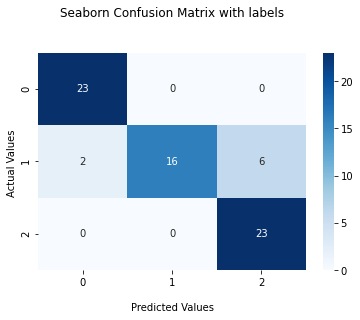

Accuracy: 0.8428571428571429
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        22
           1       1.00      0.63      0.78        30
           2       0.75      1.00      0.86        18

    accuracy                           0.84        70
   macro avg       0.85      0.88      0.84        70
weighted avg       0.88      0.84      0.83        70



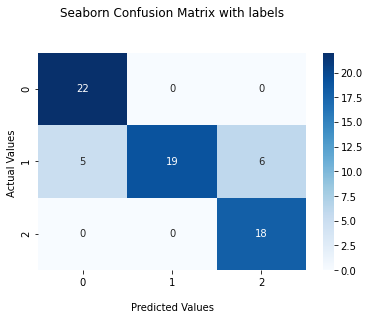

Accuracy: 0.9714285714285714
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.88      0.93        16
           2       1.00      1.00      1.00        29

    accuracy                           0.97        70
   macro avg       0.98      0.96      0.96        70
weighted avg       0.97      0.97      0.97        70



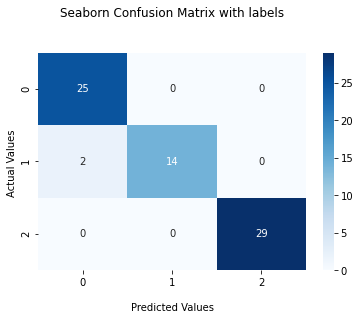

Accuracy: 0.927536231884058
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.78      0.88        23
           2       0.88      1.00      0.94        23

    accuracy                           0.93        69
   macro avg       0.93      0.93      0.93        69
weighted avg       0.93      0.93      0.93        69



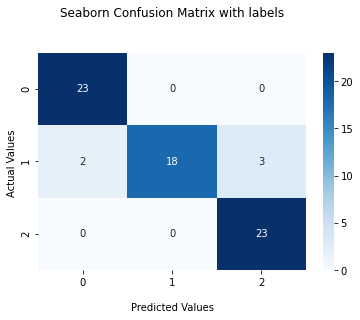

In [4]:
#Cross validation with 4 folds
kfold = KFold(n_splits=4, shuffle=True, random_state=42)

models = []
scores = []

# Folds loop
for train_index, val_index in kfold.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    #Model training
    model = LogisticRegression(solver='sag',C=1e5, max_iter=10000,random_state=42 )
    model.fit(X_train_fold, y_train_fold)
    
    #Predictions
    y_pred = model.predict(X_val_fold)
    
    #Model saving
    models.append(model)
    
    #Confusion matrix
    cf_matrix=confusion_matrix(y_val_fold,y_pred)
    
    #Accuracy
    print('Accuracy:',accuracy_score(y_val_fold,y_pred))
    
    #Classification report
    print(classification_report(y_val_fold,y_pred))
    
    #Confusion matrix plot
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Display the visualization of the Confusion Matrix.
    plt.show()



### Test

Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.88      0.91      0.89        32
           2       0.60      0.50      0.55         6

    accuracy                           0.83        42
   macro avg       0.74      0.72      0.73        42
weighted avg       0.83      0.83      0.83        42



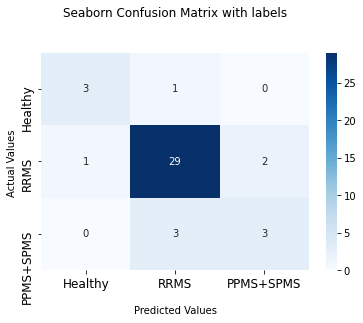

Accuracy: 0.6904761904761905
              precision    recall  f1-score   support

           0       0.29      0.50      0.36         4
           1       0.83      0.78      0.81        32
           2       0.40      0.33      0.36         6

    accuracy                           0.69        42
   macro avg       0.51      0.54      0.51        42
weighted avg       0.72      0.69      0.70        42



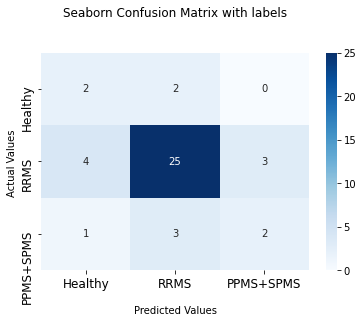

Accuracy: 0.7380952380952381
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.84      0.81      0.83        32
           2       0.33      0.33      0.33         6

    accuracy                           0.74        42
   macro avg       0.59      0.63      0.61        42
weighted avg       0.74      0.74      0.74        42



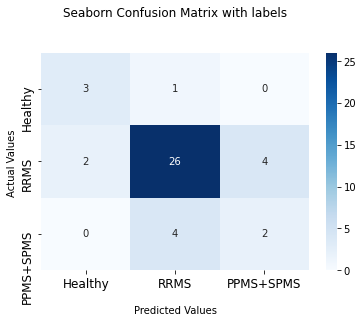

Accuracy: 0.6904761904761905
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.83      0.75      0.79        32
           2       0.25      0.33      0.29         6

    accuracy                           0.69        42
   macro avg       0.56      0.61      0.58        42
weighted avg       0.72      0.69      0.70        42



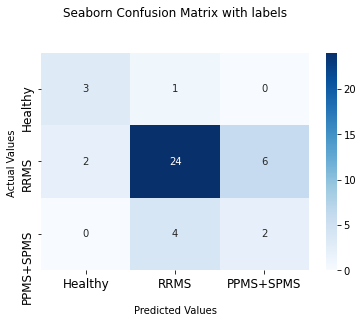

In [5]:
for k in range(4):
    #Predictions
    y_pred=models[k].predict(np.array(X_test))

    #Confusion matrix
    cf_matrix=confusion_matrix(y_test,y_pred)
    
    #Accuracy
    print('Accuracy:',accuracy_score(y_test,y_pred))
    
    #Classification report
    print(classification_report(y_test,y_pred))
    
    #Confusion matrix plot
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.xaxis.set_ticklabels(['Healthy', 'RRMS', 'PPMS+SPMS']);
    ax.yaxis.set_ticklabels(['Healthy', 'RRMS', 'PPMS+SPMS']);

    ## Display the visualization of the Confusion Matrix.
    plt.show()

### Export model

In [6]:
joblib.dump(models[0], 'MS_class_model.sav')

['MS_class_model.sav']